**Importing Libraries**

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [36]:
# Read the Assignment file
file_path = '/content/Assignment.xlsx'
xls = pd.ExcelFile(file_path)


In [37]:
sheet_names = xls.sheet_names
sheet_names

['UserDetails.csv', 'CookingSessions.csv', 'OrderDetails.csv']

In [38]:
# Load each sheet into separate DataFrames
user_details = xls.parse('UserDetails.csv')
cooking_sessions = xls.parse('CookingSessions.csv')
order_details = xls.parse('OrderDetails.csv')

print(user_details.head())
print(cooking_sessions.head())
print(order_details.head())

  User ID      User Name  Age       Location Registration Date         Phone  \
0    U001  Alice Johnson   28       New York        2023-01-15  123-456-7890   
1    U002      Bob Smith   35    Los Angeles        2023-02-20  987-654-3210   
2    U003    Charlie Lee   42        Chicago        2023-03-10  555-123-4567   
3    U004    David Brown   27  San Francisco        2023-04-05  444-333-2222   
4    U005     Emma White   30        Seattle        2023-05-22  777-888-9999   

               Email Favorite Meal  Total Orders  
0    alice@email.com        Dinner            12  
1      bob@email.com         Lunch             8  
2  charlie@email.com     Breakfast            15  
3    david@email.com        Dinner            10  
4     emma@email.com         Lunch             9  
  Session ID User ID        Dish Name  Meal Type       Session Start  \
0       S001    U001        Spaghetti     Dinner 2024-12-01 19:00:00   
1       S002    U002     Caesar Salad      Lunch 2024-12-01 12:00:00 

In [39]:
# we will check for missing values in each dataset
missing_values = {
    "UserDetails": user_details.isnull().sum(),
    "CookingSessions": cooking_sessions.isnull().sum(),
    "OrderDetails": order_details.isnull().sum()
}

print(missing_values)


{'UserDetails': User ID              0
User Name            0
Age                  0
Location             0
Registration Date    0
Phone                0
Email                0
Favorite Meal        0
Total Orders         0
dtype: int64, 'CookingSessions': Session ID         0
User ID            0
Dish Name          0
Meal Type          0
Session Start      0
Session End        0
Duration (mins)    0
Session Rating     0
dtype: int64, 'OrderDetails': Order ID        0
User ID         0
Order Date      0
Meal Type       0
Dish Name       0
Order Status    0
Amount (USD)    0
Time of Day     0
Rating          2
Session ID      0
dtype: int64}


*We found 2 missing values in Rating column*

In [40]:
# we can fill the missing ratings in the OrderDetails with the mean rating
order_details['Rating'].fillna(order_details['Rating'].mean(), inplace=True)

print(order_details.isnull().sum())


Order ID        0
User ID         0
Order Date      0
Meal Type       0
Dish Name       0
Order Status    0
Amount (USD)    0
Time of Day     0
Rating          0
Session ID      0
dtype: int64


<ipython-input-40-46ae261bdf05>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  order_details['Rating'].fillna(order_details['Rating'].mean(), inplace=True)


In [41]:
# Check the column names in both datasets
print(order_sessions.columns)
print(user_details.columns)


Index(['Order ID', 'User ID', 'Order Date', 'Meal Type_x', 'Dish Name_x',
       'Order Status', 'Amount (USD)', 'Time of Day', 'Rating', 'Session ID',
       'User ID_y', 'Dish Name_y', 'Meal Type_y', 'Session Start',
       'Session End', 'Duration (mins)', 'Session Rating'],
      dtype='object')
Index(['User ID', 'User Name', 'Age', 'Location', 'Registration Date', 'Phone',
       'Email', 'Favorite Meal', 'Total Orders'],
      dtype='object')


In [42]:
order_sessions.head()

,Order ID,User ID,Order Date,Meal Type_x,Dish Name_x,Order Status,Amount (USD),Time of Day,Rating,Session ID,User ID_y,Dish Name_y,Meal Type_y,Session Start,Session End,Duration (mins),Session Rating
0,1001,U001,2024-12-01,Dinner,Spaghetti,Completed,15.0,Night,5.000000,S001,U001,Spaghetti,Dinner,2024-12-01 19:00:00,2024-12-01 19:30:00,30,4.5
1,1002,U002,2024-12-01,Lunch,Caesar Salad,Completed,10.0,Day,4.000000,S002,U002,Caesar Salad,Lunch,2024-12-01 12:00:00,2024-12-01 12:20:00,20,4.0
2,1003,U003,2024-12-02,Dinner,Grilled Chicken,Canceled,12.5,Night,4.285714,S003,U003,Grilled Chicken,Dinner,2024-12-02 19:30:00,2024-12-02 20:10:00,40,4.8
3,1004,U001,2024-12-02,Breakfast,Pancakes,Completed,8.0,Morning,4.000000,S004,U001,Pancakes,Breakfast,2024-12-02 07:30:00,2024-12-02 08:00:00,30,4.2
4,1005,U004,2024-12-03,Lunch,Caesar Salad,Completed,9.0,Day,4.000000,S005,U004,Caesar Salad,Lunch,2024-12-03 13:00:00,2024-12-03 13:15:00,15,4.7


**We will merge the three columns together**

In [43]:
# here we want to rename 'User ID_x' or 'User ID_y' to 'User ID', because common column name shoud be same for joining purpose
order_sessions.rename(columns={'User ID_x': 'User ID'}, inplace=True)

merged_data = pd.merge(order_sessions, user_details, on='User ID')

print(merged_data.head())


   Order ID User ID Order Date Meal Type_x      Dish Name_x Order Status  \
0      1001    U001 2024-12-01      Dinner        Spaghetti    Completed   
1      1002    U002 2024-12-01       Lunch     Caesar Salad    Completed   
2      1003    U003 2024-12-02      Dinner  Grilled Chicken     Canceled   
3      1004    U001 2024-12-02   Breakfast         Pancakes    Completed   
4      1005    U004 2024-12-03       Lunch     Caesar Salad    Completed   

   Amount (USD) Time of Day    Rating Session ID  ... Duration (mins)  \
0          15.0       Night  5.000000       S001  ...              30   
1          10.0         Day  4.000000       S002  ...              20   
2          12.5       Night  4.285714       S003  ...              40   
3           8.0     Morning  4.000000       S004  ...              30   
4           9.0         Day  4.000000       S005  ...              15   

  Session Rating      User Name Age       Location  Registration Date  \
0            4.5  Alice Johnson

**Analyzing the Relationship between Cooking Sessions and User Orders**

In [44]:
# Check how often users order dishes they have cooked
ordered_cooked_data = merged_data[merged_data['Dish Name_x'] == merged_data['Dish Name_y']]

total_orders = len(merged_data)
matched_orders = len(ordered_cooked_data)
percentage_matched = (matched_orders / total_orders) * 100

print(f"{percentage_matched:.2f}% of orders are for dishes that users have cooked.")


100.00% of orders are for dishes that users have cooked.


**Identifying Popular Dishes**

In [45]:
# here we will analyze popular dishes based on orders and cooking sessions
popular_dishes_orders = merged_data['Dish Name_x'].value_counts().head(10)
print("Top 10 most popular dishes based on orders:")
print(popular_dishes_orders)

popular_dishes_cooked = merged_data['Dish Name_y'].value_counts().head(10)
print("Top 10 most popular dishes based on cooking sessions:")
print(popular_dishes_cooked)


Top 10 most popular dishes based on orders:
Dish Name_x
Spaghetti          4
Grilled Chicken    4
Caesar Salad       3
Pancakes           2
Veggie Burger      2
Oatmeal            1
Name: count, dtype: int64
Top 10 most popular dishes based on cooking sessions:
Dish Name_y
Spaghetti          4
Grilled Chicken    4
Caesar Salad       3
Pancakes           2
Veggie Burger      2
Oatmeal            1
Name: count, dtype: int64


**Exploring Demographic Factors Influencing User Behavior**

In [46]:
# Analyze dish preferences by age group
age_groups = pd.cut(merged_data['Age'], bins=[18, 25, 35, 50, 65, 100], labels=['18-25', '26-35', '36-50', '51-65', '65+'])
age_dish_preferences = merged_data.groupby(age_groups)['Dish Name_x'].value_counts().groupby(level=0).head(3)
print("Top 3 popular dishes by age group:")
print(age_dish_preferences)

# Analyze favorite meal types by location
location_meal_preferences = merged_data.groupby('Location')['Meal Type_x'].value_counts().groupby(level=0).head(1)
print("Most popular meal type by location:")
print(location_meal_preferences)


Top 3 popular dishes by age group:
Age    Dish Name_x    
18-25  Grilled Chicken    1
       Caesar Salad       0
       Oatmeal            0
26-35  Caesar Salad       3
       Spaghetti          3
       Grilled Chicken    2
36-50  Grilled Chicken    1
       Pancakes           1
       Spaghetti          1
51-65  Caesar Salad       0
       Grilled Chicken    0
       Oatmeal            0
65+    Caesar Salad       0
       Grilled Chicken    0
       Oatmeal            0
Name: count, dtype: int64
Most popular meal type by location:
Location       Meal Type_x
Austin         Dinner         1
Boston         Dinner         1
Chicago        Breakfast      1
Los Angeles    Breakfast      1
Miami          Lunch          1
New York       Dinner         2
San Francisco  Dinner         1
Seattle        Dinner         1
Name: count, dtype: int64


<ipython-input-46-4cdc2c4f0954>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_dish_preferences = merged_data.groupby(age_groups)['Dish Name_x'].value_counts().groupby(level=0).head(3)
<ipython-input-46-4cdc2c4f0954>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_dish_preferences = merged_data.groupby(age_groups)['Dish Name_x'].value_counts().groupby(level=0).head(3)


**visualizations to showcase key insights**

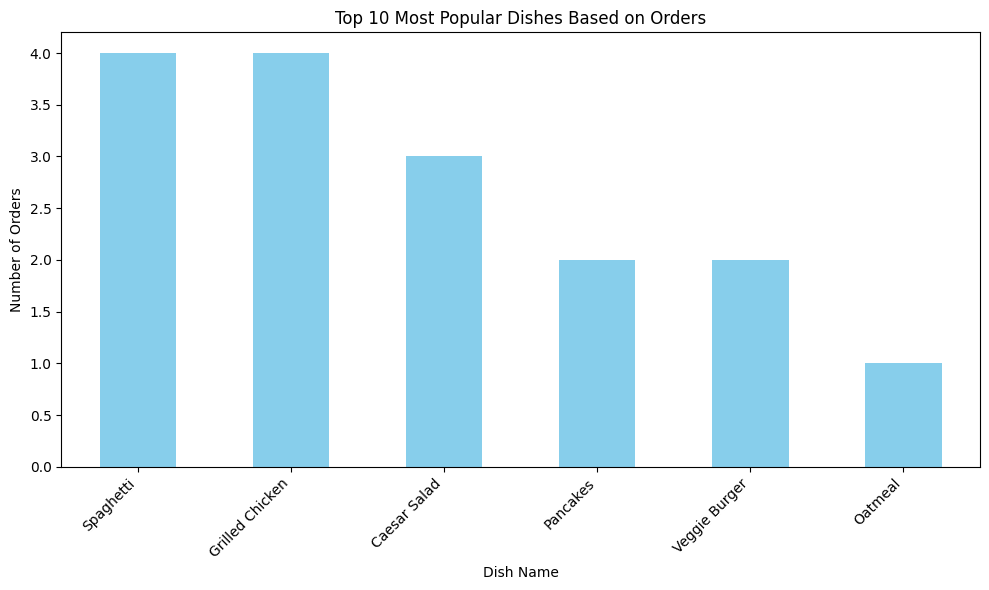

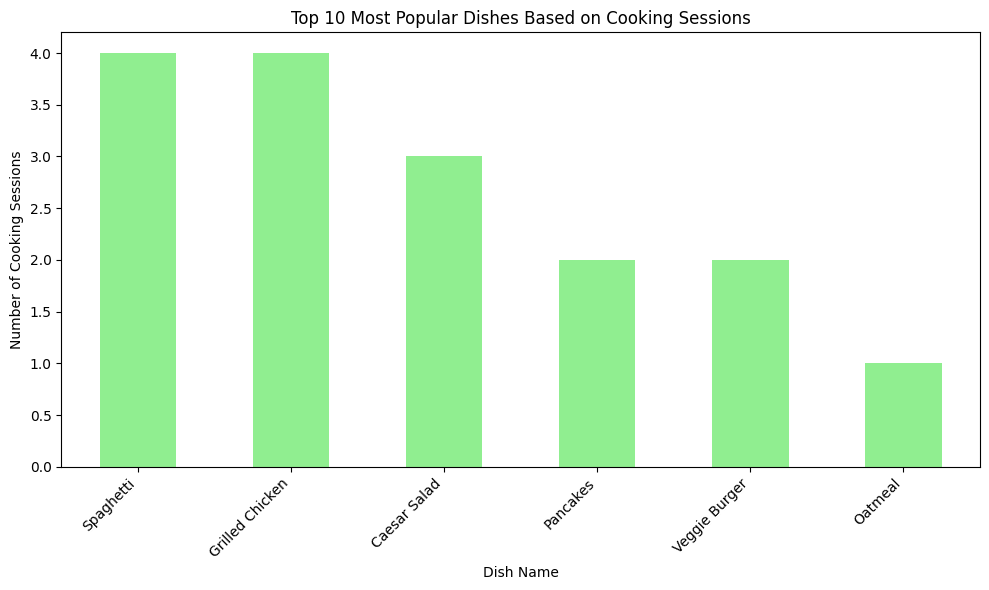

<Figure size 1000x600 with 0 Axes>

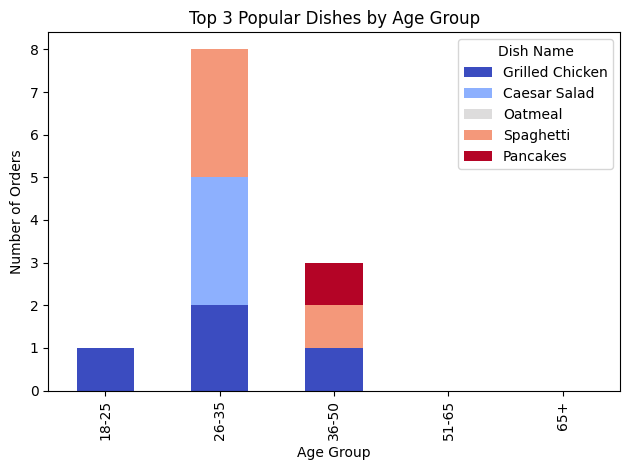

In [47]:
# Popular dishes based on orders
plt.figure(figsize=(10, 6))
popular_dishes_orders.plot(kind='bar', color='skyblue')
plt.title('Top 10 Most Popular Dishes Based on Orders')
plt.xlabel('Dish Name')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Popular dishes based on cooking sessions
plt.figure(figsize=(10, 6))
popular_dishes_cooked.plot(kind='bar', color='lightgreen')
plt.title('Top 10 Most Popular Dishes Based on Cooking Sessions')
plt.xlabel('Dish Name')
plt.ylabel('Number of Cooking Sessions')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Dish preferences by age group
plt.figure(figsize=(10, 6))
age_dish_preferences.unstack().plot(kind='bar', stacked=True, colormap='coolwarm')
plt.title('Top 3 Popular Dishes by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Orders')
plt.legend(title="Dish Name")
plt.tight_layout()
plt.show()


In [48]:
# we can save the merged data to a CSV file
merged_data.to_csv('merged_data.csv', index=False)


user_details.to_csv('cleaned_user_details.csv', index=False)
cooking_sessions.to_csv('cleaned_cooking_sessions.csv', index=False)
order_details.to_csv('cleaned_order_details.csv', index=False)
